In [2]:
import cv2
from IPython.display import Video

def analyze_video(video_path):
    # Display video using IPython
    display(Video(video_path))
    
    # Open video file
    cap = cv2.VideoCapture(video_path)
    
    # Get video properties
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Print information
    print(f"Total frames: {frame_count}")
    print(f"Frames per second (FPS): {fps}")
    
    # Release the video capture object
    cap.release()

test_path = '/proj/aicell/users/x_aleho/video-diffusion/data/processed/idr0013/LT0001_02/00223_01.mp4'
analyze_video(test_path)

Total frames: 81
Frames per second (FPS): 10.0


In [3]:
def plot_video_frames(video_path, end_frame=None, frames_per_row=5):
    """
    Plot frames from a video in a grid layout.
    
    Args:
        video_path (str): Path to the video file
        end_frame (int, optional): Last frame to display. If None, displays all frames.
        frames_per_row (int, optional): Number of frames to display per row. Default is 5.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Open video file
    cap = cv2.VideoCapture(video_path)
    
    # Get total frame count if end_frame is not specified
    if end_frame is None:
        end_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Read frames
    frames = []
    frame_count = 0
    
    while cap.isOpened() and frame_count < end_frame:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert BGR to RGB (matplotlib uses RGB)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame_rgb)
        frame_count += 1
    
    cap.release()
    
    # Calculate grid dimensions
    num_frames = len(frames)
    num_rows = int(np.ceil(num_frames / frames_per_row))
    
    # Create figure
    plt.figure(figsize=(15, 3 * num_rows))
    
    # Plot frames
    for i, frame in enumerate(frames):
        plt.subplot(num_rows, frames_per_row, i + 1)
        plt.imshow(frame)
        plt.title(f"Frame {i}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

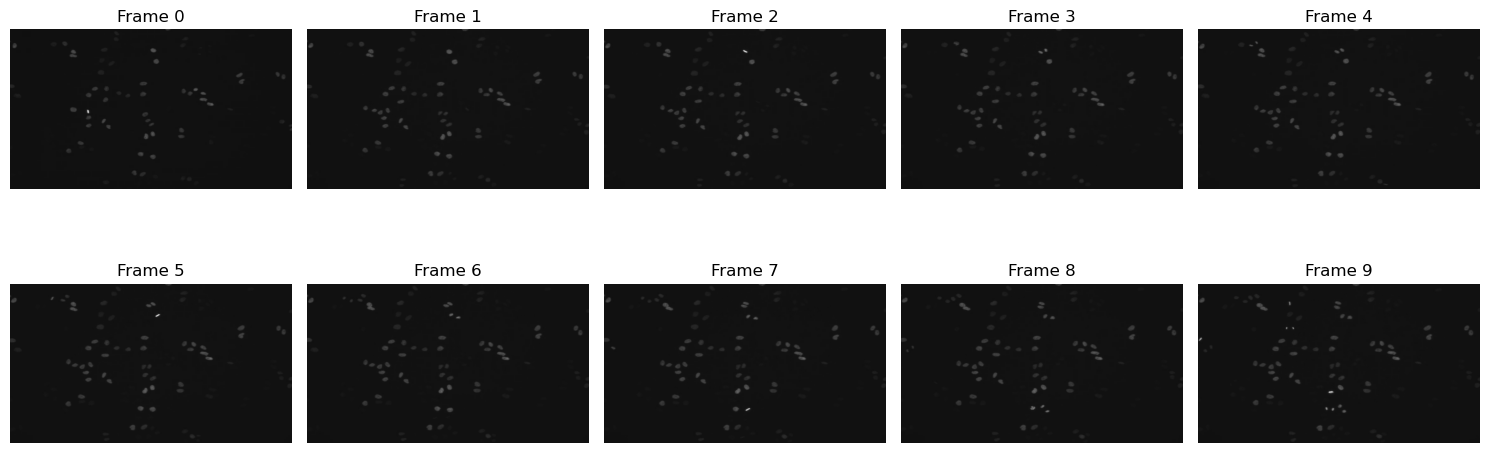

In [4]:
plot_video_frames('/proj/aicell/users/x_aleho/video-diffusion/data/processed/idr0013/LT0001_02/00223_01.mp4', end_frame=10)

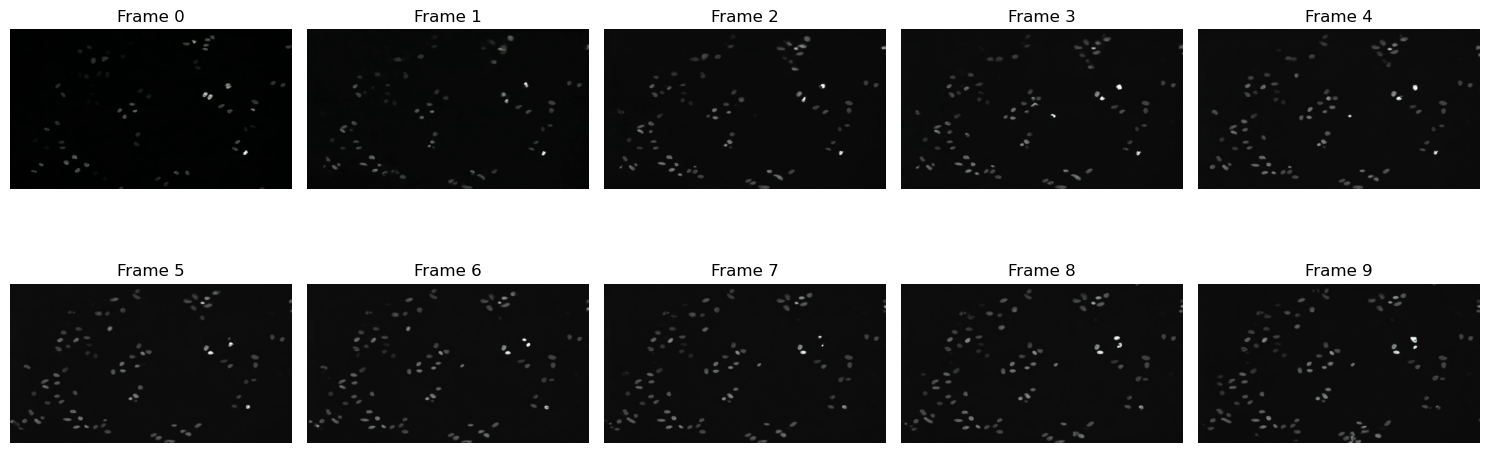

Total frames: 81
Frames per second (FPS): 15.0


In [5]:
path = '/proj/aicell/users/x_aleho/video-diffusion/CogVideo/models/loras/IDR0013-10plates-i2v-r128-a64/validation_res/validation-gen-350-1-<ALEXANDER>-Time-lapse-mi-23565.mp4'
plot_video_frames(path, end_frame=10)
analyze_video(path)

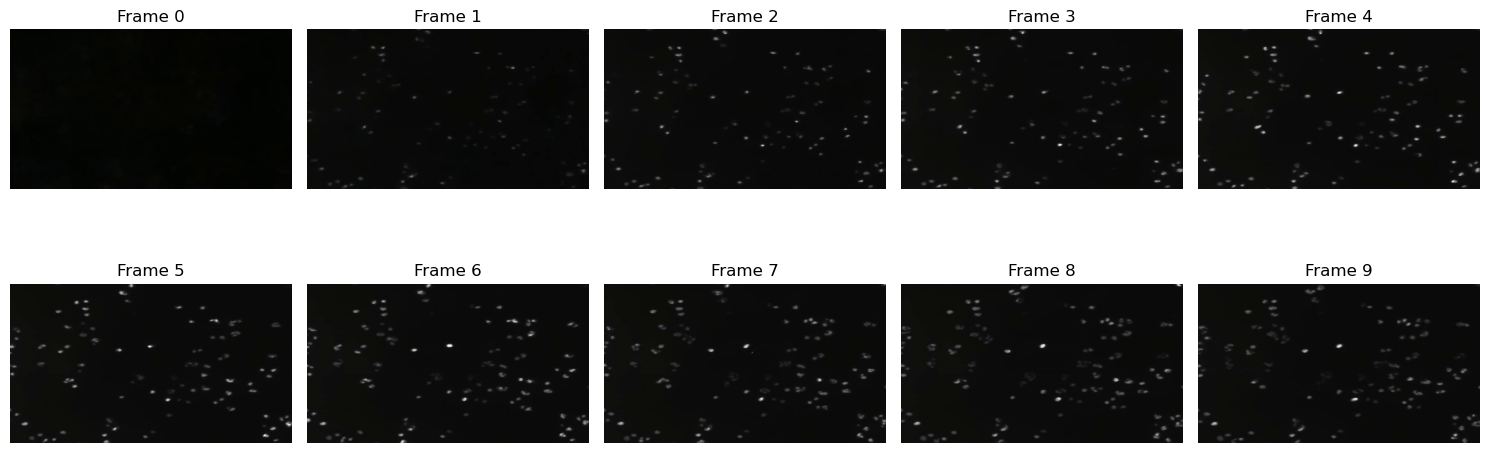

Total frames: 81
Frames per second (FPS): 10.0


: 

In [12]:
path = '/proj/aicell/users/x_aleho/video-diffusion/CogVideo/inference/test_generations/i2v_r128_500/LT0004_11-00003_01_S50_G8_F81_FPS10.mp4'
plot_video_frames(path, end_frame=10)
analyze_video(path)